In [130]:
import pandas as pd
import numpy as np
import copy
import random
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
import time
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [44]:
data = pd.read_csv("biodeg.csv", sep=" ")
print(data)

      SpMax_L  J_Dz(e)    C%  SdssC  HyWi_B(m)    LOC   SM6_L  F03[C-O]  \
1       3.919   2.6909  31.4  0.000      3.106  2.550   9.002         0   
2       4.170   2.1144  30.8  0.000      2.461  1.393   8.723         1   
3       3.932   3.2512  26.7  0.000      3.279  2.585   9.110         0   
4       3.000   2.7098  20.0  0.000      2.100  0.918   6.594         0   
5       4.236   3.3944  29.4 -0.271      3.449  2.753   9.528         2   
...       ...      ...   ...    ...        ...    ...     ...       ...   
1051    5.431   2.8955  32.1  0.374      3.233  0.832  10.681         2   
1052    5.287   3.3732  35.3 -5.256      4.319  2.346  11.029        21   
1053    4.869   1.7670  44.4 -0.391      4.435  1.073  11.072         9   
1054    5.158   1.6914  56.1  0.000      4.902  0.257  11.817         0   
1055    5.076   2.6588  54.5  0.000      3.792  0.673  10.327         0   

         Me     Mi  ...  B01[C-Br]  B03[C-Cl]  SpMax_A  Psi_i_1d     SdO  \
1     0.960  1.142  ...

In [45]:
data.head()


,SpMax_L,J_Dz(e),C%,SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,...,B01[C-Br],B03[C-Cl],SpMax_A,Psi_i_1d,SdO,TI2_L,SpMax_B(m),Psi_i_A,SM6_B(m),Y
1,3.919,2.6909,31.4,0.000,3.106,2.550,9.002,0,0.960,1.142,...,0,0,1.932,0.011,0.000,4.489,2.949,1.591,7.253,1
2,4.170,2.1144,30.8,0.000,2.461,1.393,8.723,1,0.989,1.144,...,0,0,2.214,-0.204,0.000,1.542,3.315,1.967,7.257,1
3,3.932,3.2512,26.7,0.000,3.279,2.585,9.110,0,1.009,1.152,...,0,0,1.942,-0.008,0.000,4.891,3.076,2.417,7.601,1
4,3.000,2.7098,20.0,0.000,2.100,0.918,6.594,0,1.108,1.167,...,0,0,1.414,1.073,8.361,1.333,3.046,5.000,6.690,1
5,4.236,3.3944,29.4,-0.271,3.449,2.753,9.528,2,1.004,1.147,...,0,0,1.985,-0.002,10.348,5.588,3.351,2.405,8.003,1


In [104]:

keysqual = ['F03[C-O]', 'B01[C-Br]', 'B03[C-Cl]']

keysquant = []
for i in data.keys():
    if i not in keysqual and i != 'Y':
        keysquant.append(i)

print(data[keysqual])
print(data[keysquant])

      F03[C-O]  B01[C-Br]  B03[C-Cl]
1            0          0          0
2            1          0          0
3            0          0          0
4            0          0          0
5            2          0          0
...        ...        ...        ...
1051         2          0          0
1052        21          0          0
1053         9          0          0
1054         0          0          1
1055         0          0          1

[1055 rows x 3 columns]
      SpMax_L  J_Dz(e)    C%  SdssC  HyWi_B(m)    LOC   SM6_L     Me     Mi  \
1       3.919   2.6909  31.4  0.000      3.106  2.550   9.002  0.960  1.142   
2       4.170   2.1144  30.8  0.000      2.461  1.393   8.723  0.989  1.144   
3       3.932   3.2512  26.7  0.000      3.279  2.585   9.110  1.009  1.152   
4       3.000   2.7098  20.0  0.000      2.100  0.918   6.594  1.108  1.167   
5       4.236   3.3944  29.4 -0.271      3.449  2.753   9.528  1.004  1.147   
...       ...      ...   ...    ...        ...    ...    

In [27]:
data.describe()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,...,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,4.782644,3.069508,0.716588,0.042654,0.980095,0.290047,1.646445,37.055640,1.376303,1.803791,...,0.129858,0.883412,1.274882,0.961137,3.918240,2.558417,0.686256,8.629492,0.051185,0.723223
std,0.546916,0.831308,1.462452,0.256010,2.332955,1.073771,2.224822,9.144466,1.963521,1.775435,...,0.644057,1.520467,2.273994,1.257013,0.999602,0.642765,1.090389,1.241986,0.318970,2.239286
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000
25%,4.481000,2.502750,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.487500,2.103000,0.000000,7.991000,0.000000,0.000000
50%,4.828000,3.046300,0.000000,0.000000,0.000000,0.000000,1.000000,37.500000,1.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,3.726000,2.458000,0.000000,8.499000,0.000000,0.000000
75%,5.125000,3.437650,1.000000,0.000000,1.000000,0.000000,3.000000,43.400000,2.000000,3.000000,...,0.000000,1.000000,2.000000,2.000000,3.987000,2.870500,1.000000,9.020500,0.000000,0.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,...,8.000000,12.000000,18.000000,7.000000,10.695000,5.825000,8.000000,14.700000,4.000000,27.000000


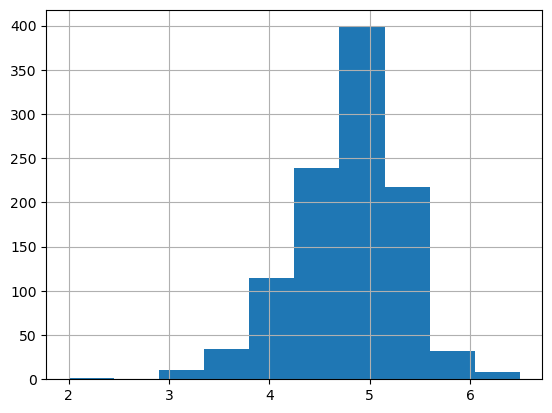

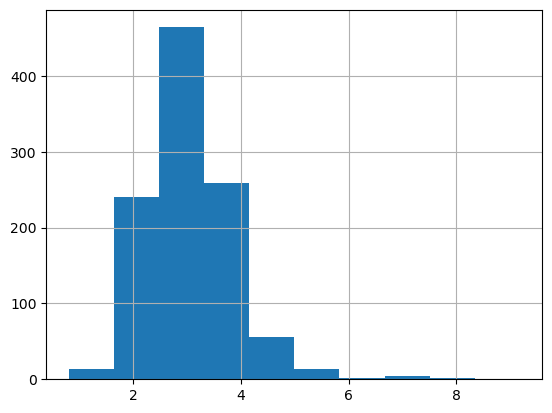

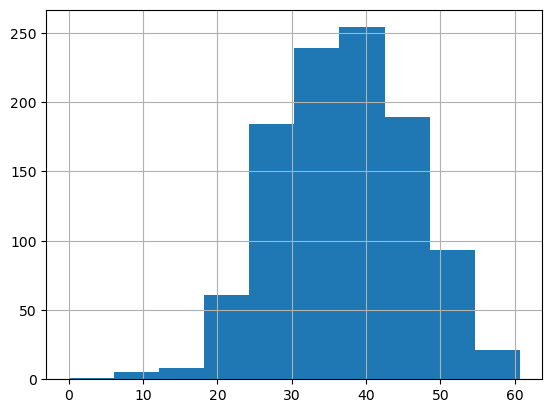

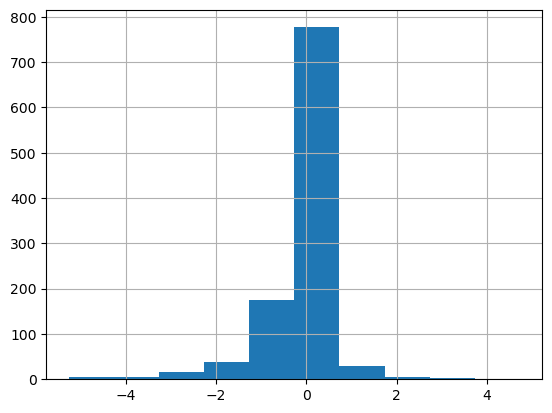

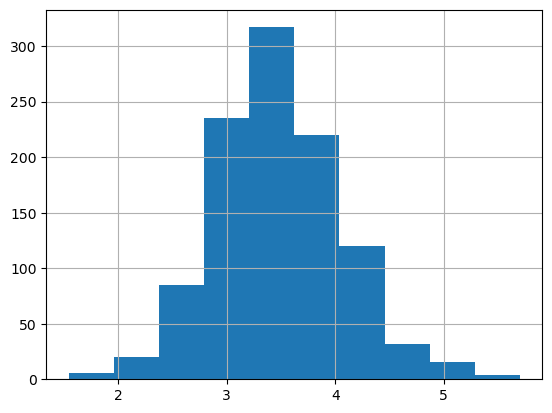

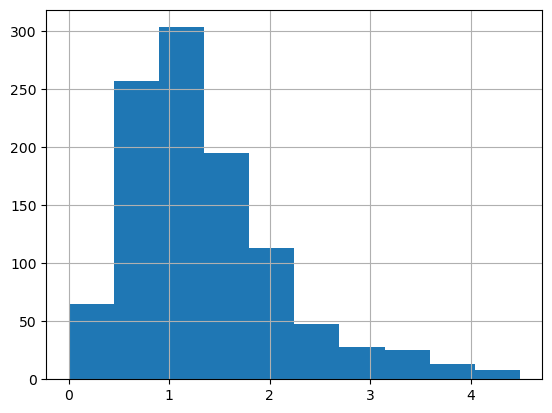

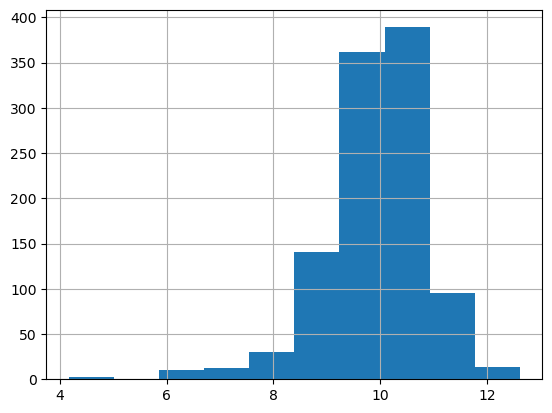

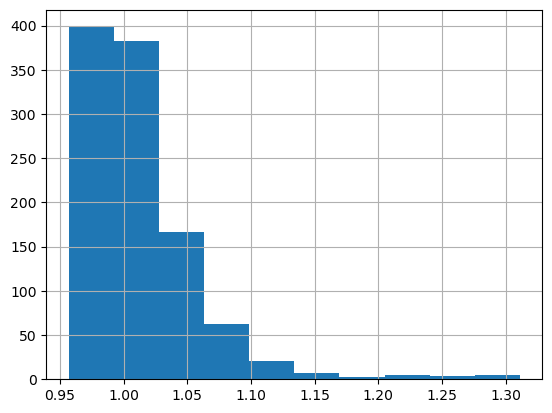

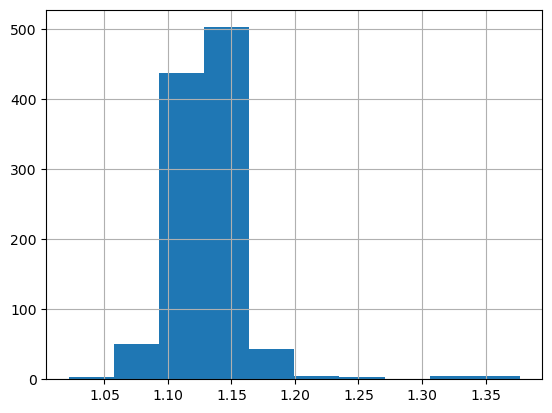

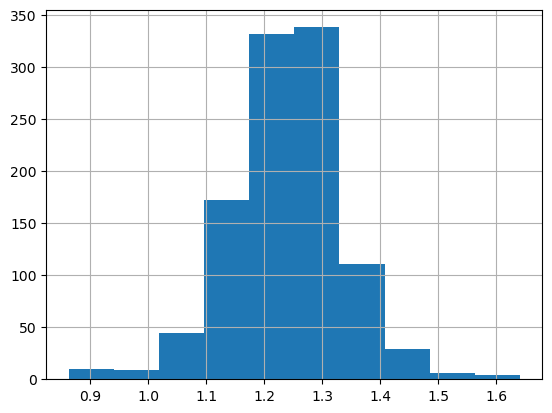

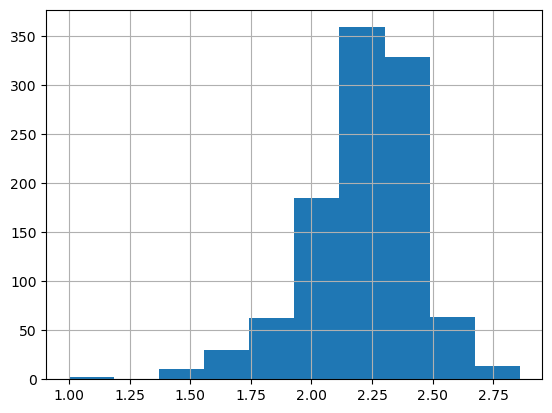

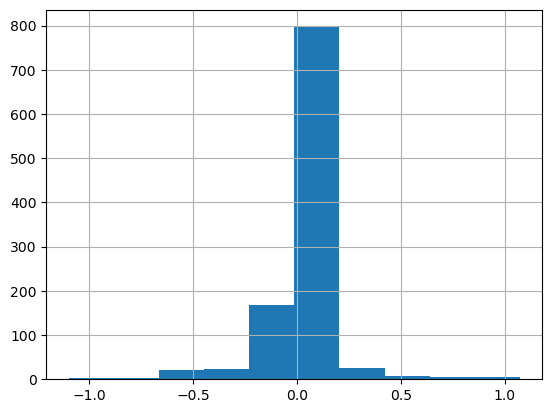

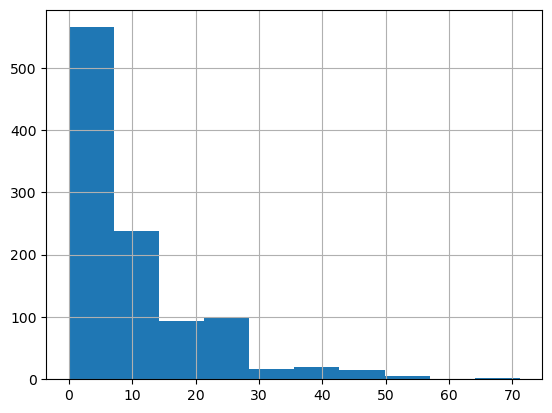

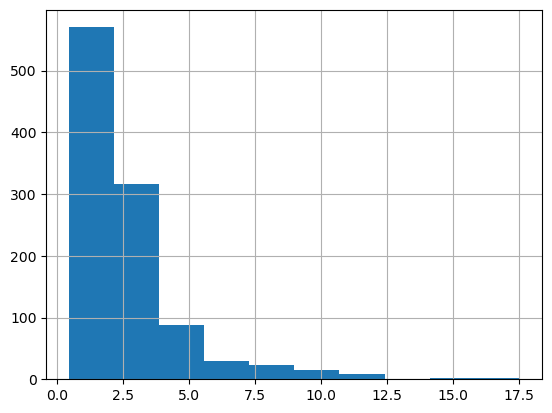

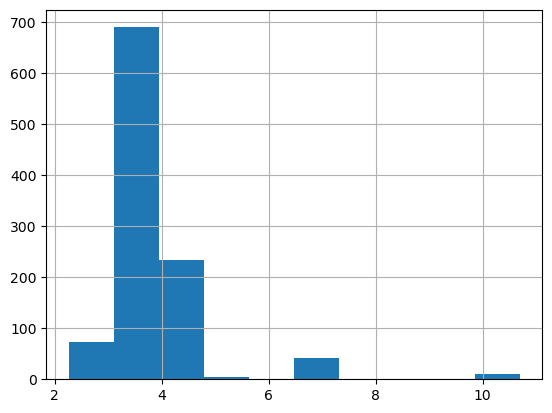

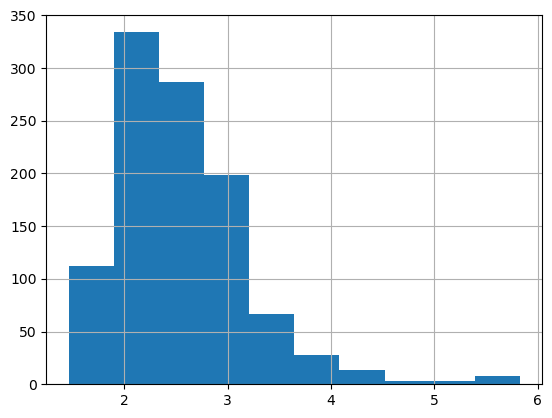

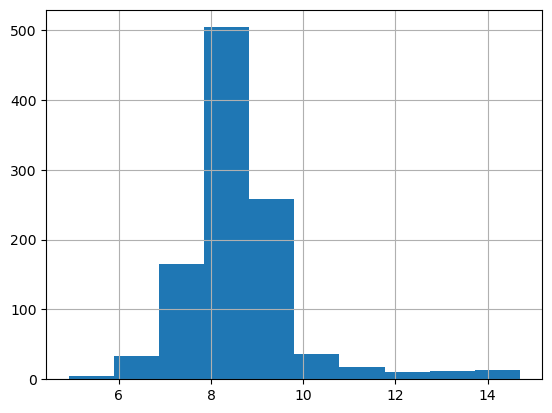

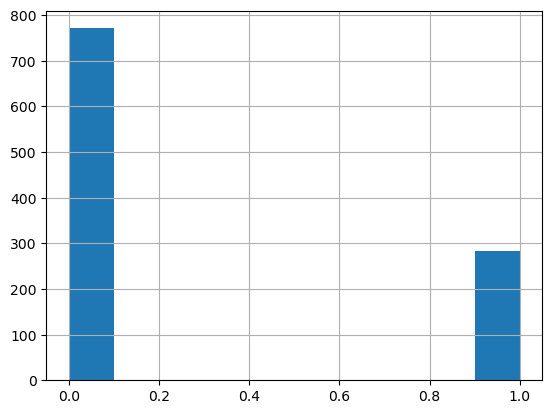

In [62]:
# histogramme des variables quantis
for i in keysquant :
    data[i].hist()
    plt.show()

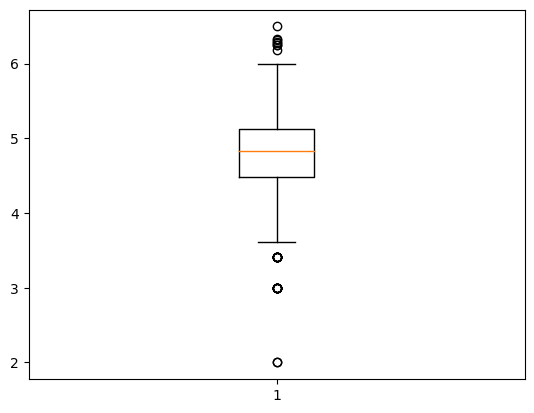

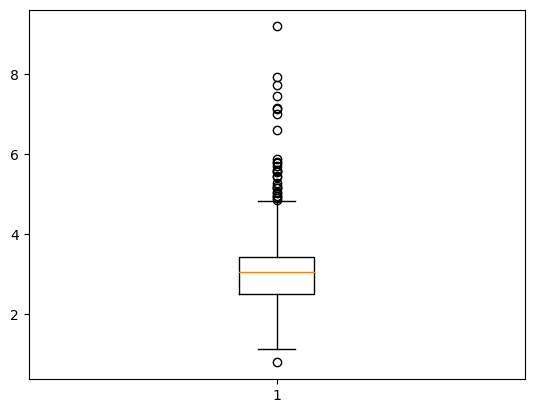

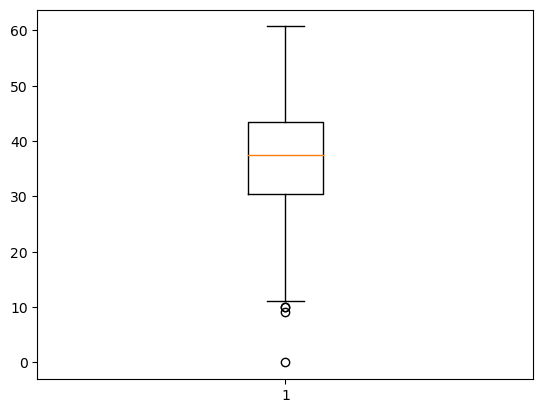

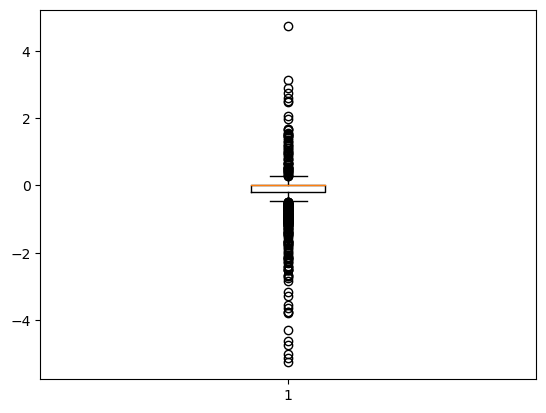

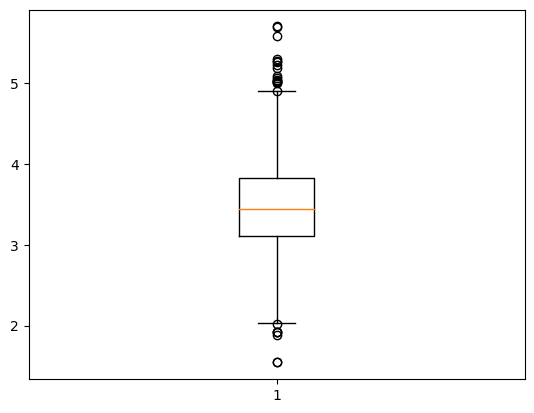

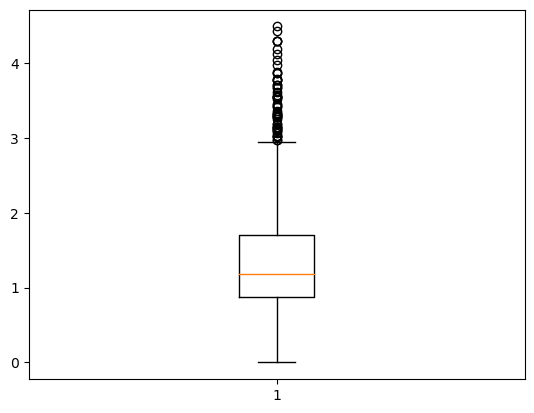

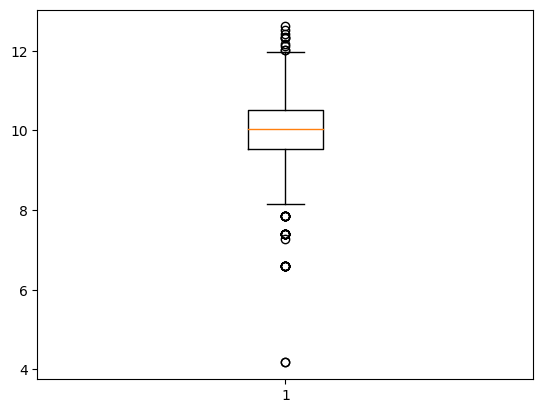

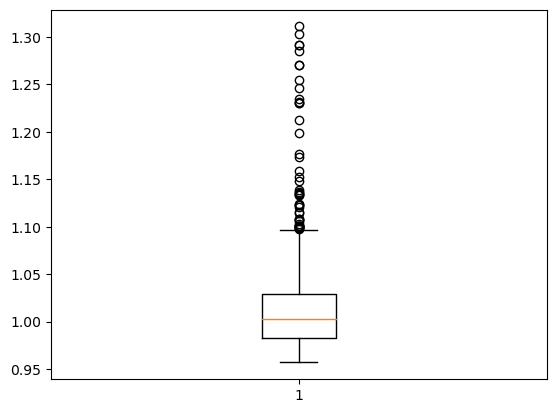

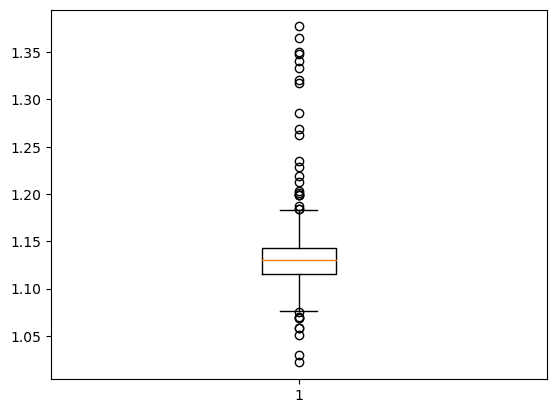

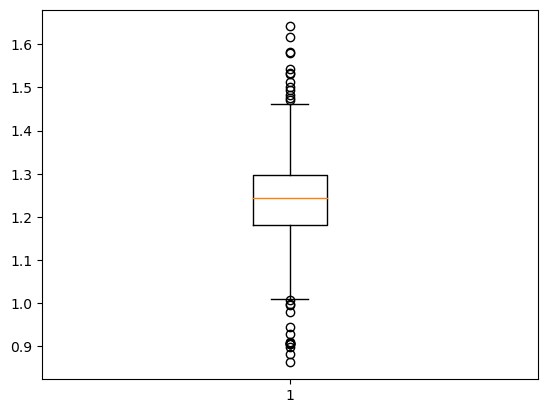

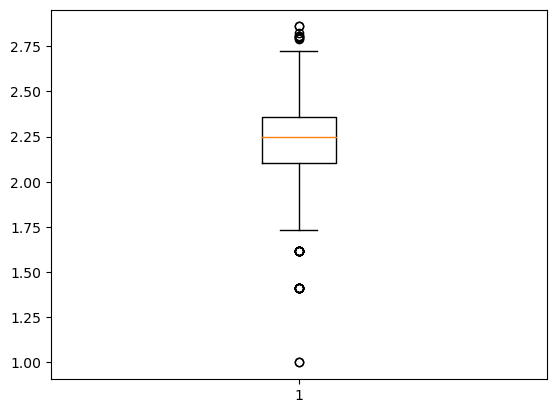

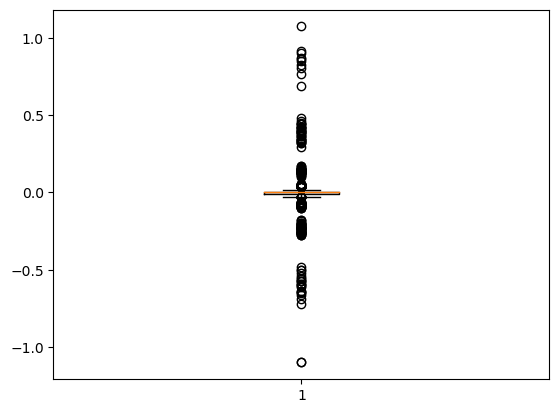

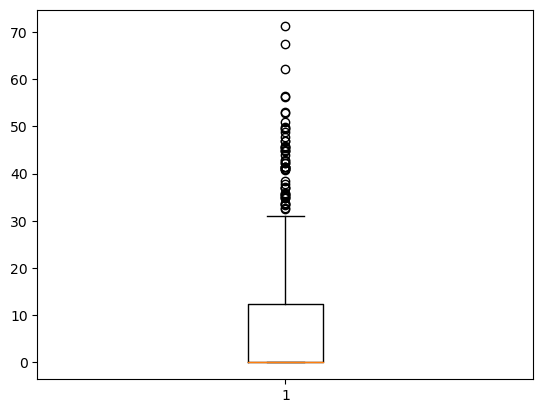

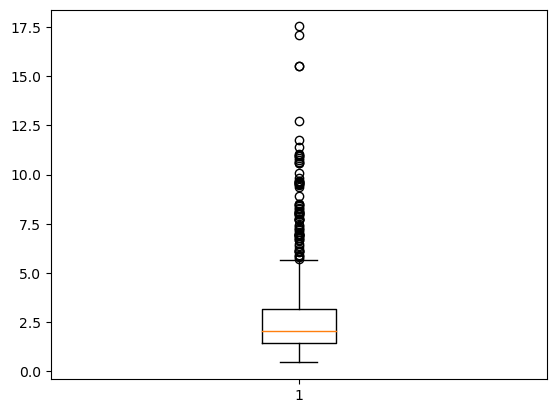

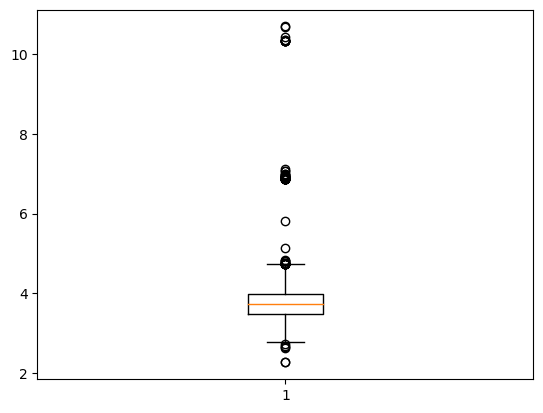

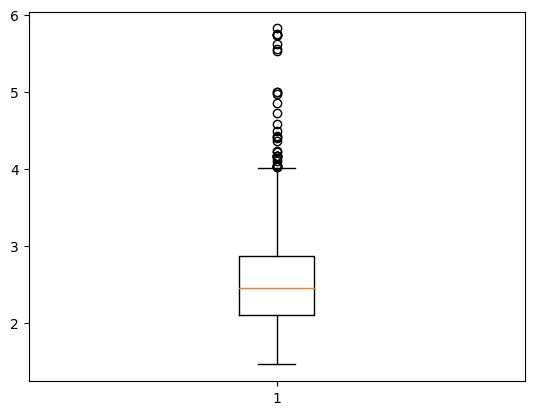

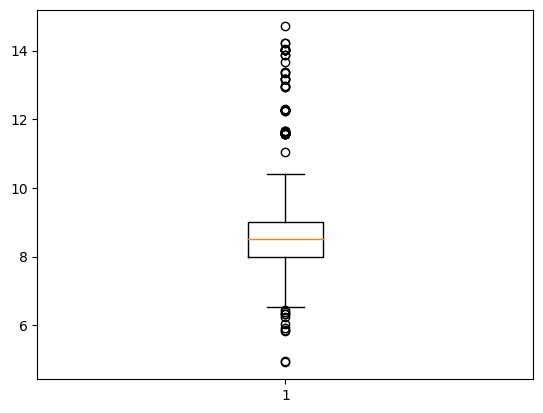

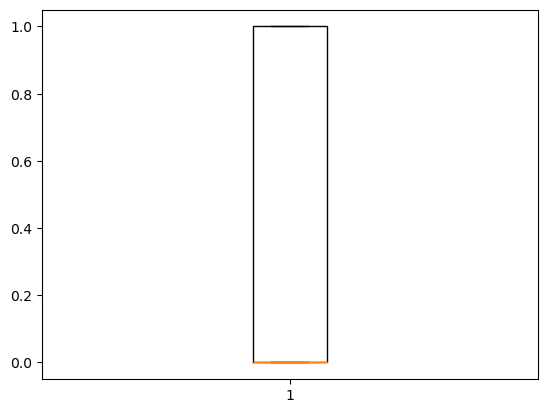

In [63]:
# boxplot des variables quantis
for i in keysquant:
    
    plt.boxplot(data[i])
    plt.show()

In [161]:
print(np.sort(data["SpMax_B(m)"])[-60:])

[ 4.77   4.819  4.823  4.824  4.828  5.127  5.808  6.866  6.866  6.866
  6.867  6.867  6.87   6.872  6.873  6.874  6.874  6.879  6.879  6.879
  6.88   6.88   6.88   6.88   6.88   6.881  6.881  6.881  6.886  6.89
  6.892  6.896  6.901  6.911  6.912  6.912  6.914  6.915  6.918  6.925
  6.951  6.954  6.982  6.982  6.99   6.991  7.065  7.078  7.129 10.319
 10.319 10.323 10.323 10.323 10.329 10.349 10.355 10.428 10.692 10.695]


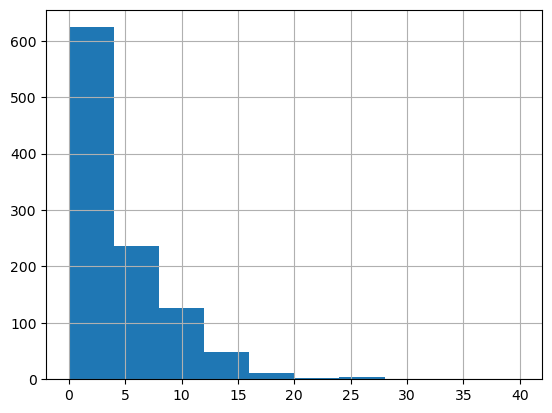

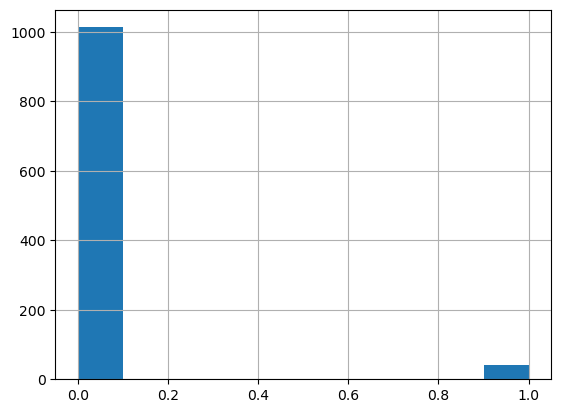

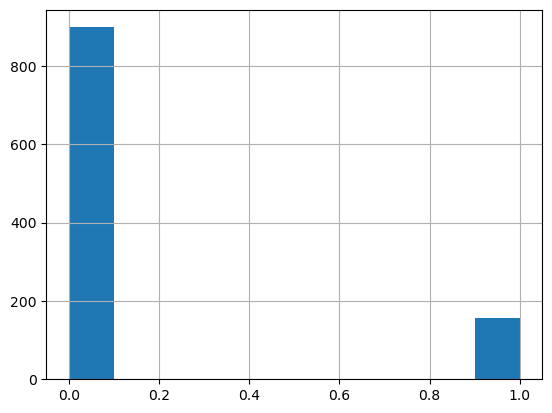

In [97]:
#mosaique des variables qualis

data[keysqual[0]].hist()
plt.show()
data[keysqual[1]].hist()
plt.show()
data[keysqual[2]].hist()
plt.show()


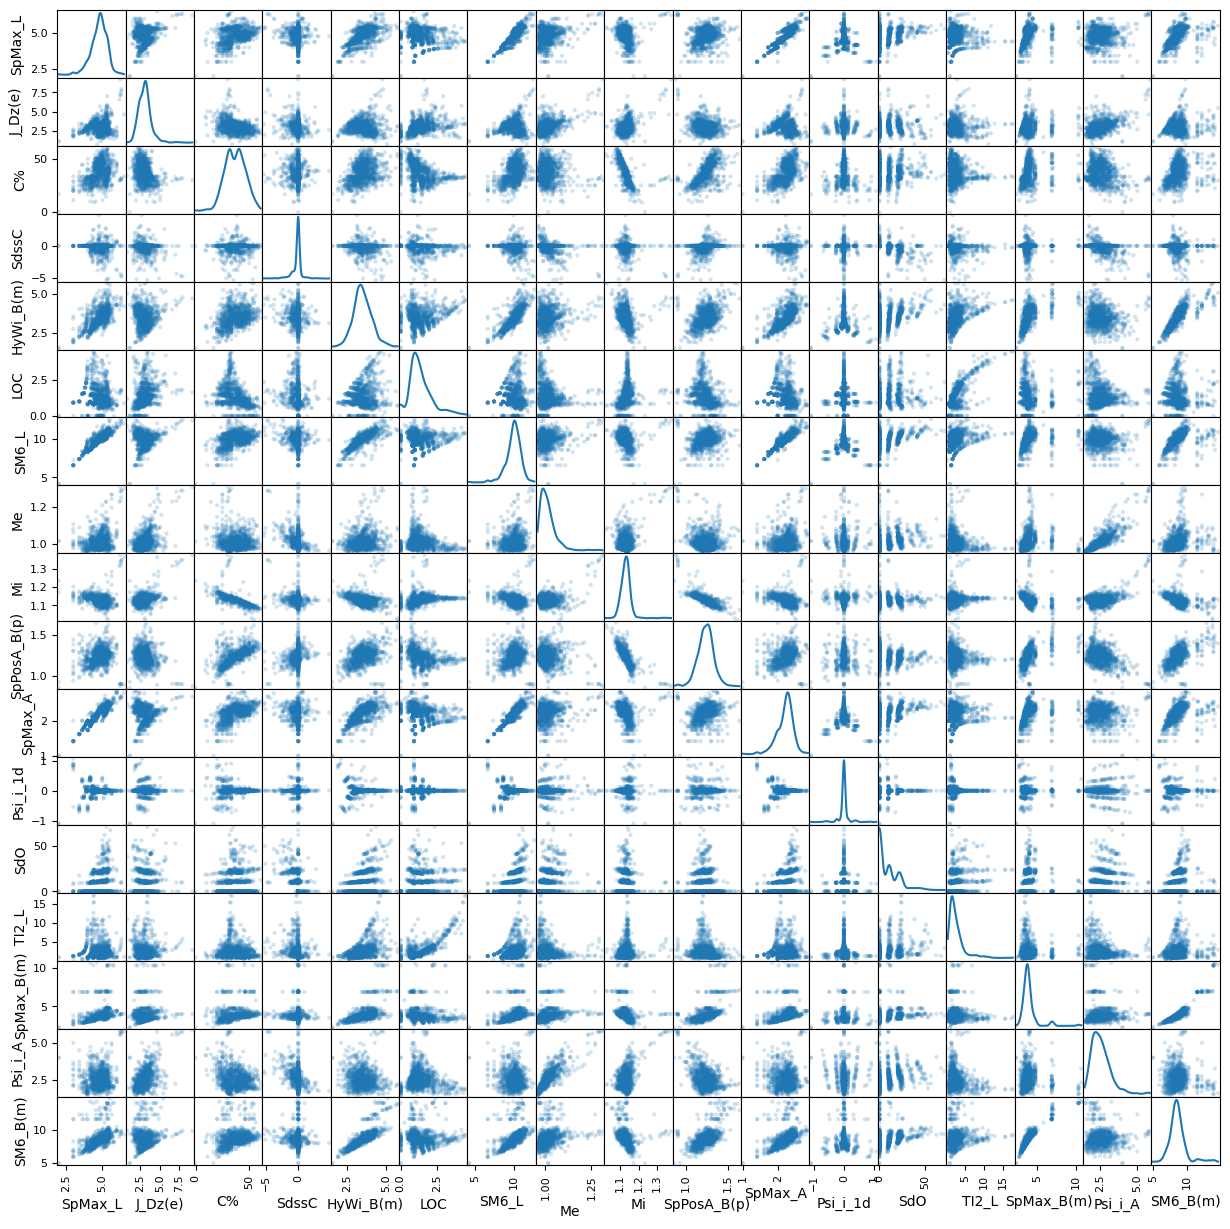

In [115]:
# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix

scatter_matrix(data[keysquant], alpha=0.2, 
               figsize=(15, 15), diagonal='kde')
plt.show()

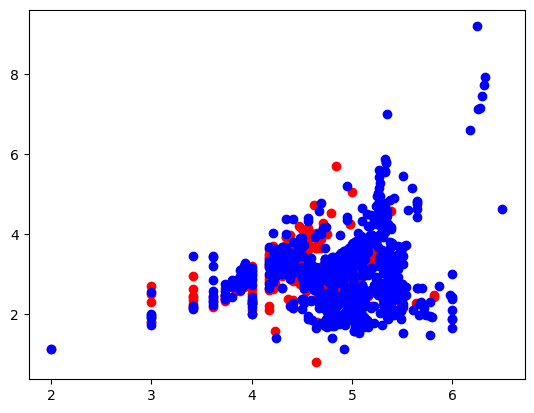

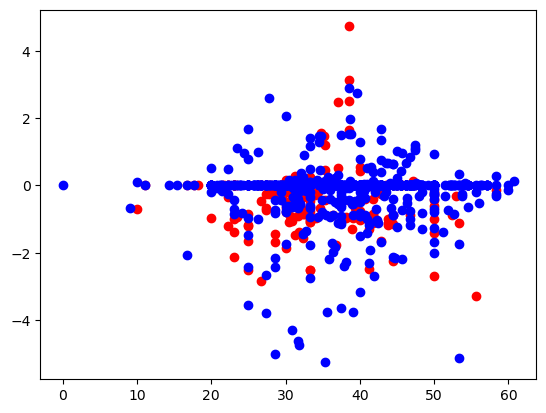

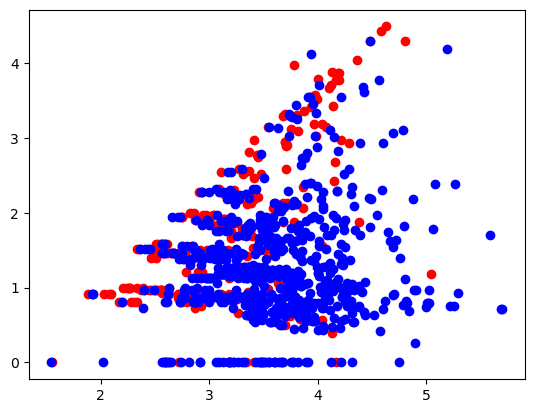

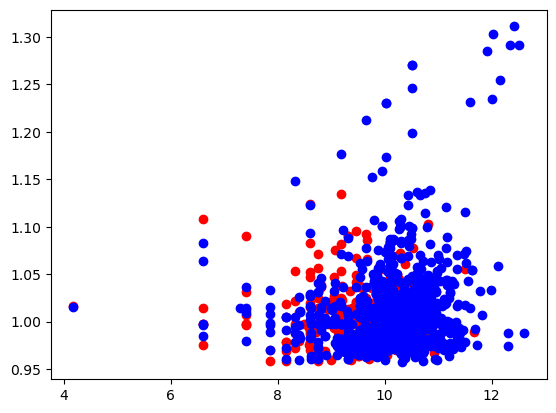

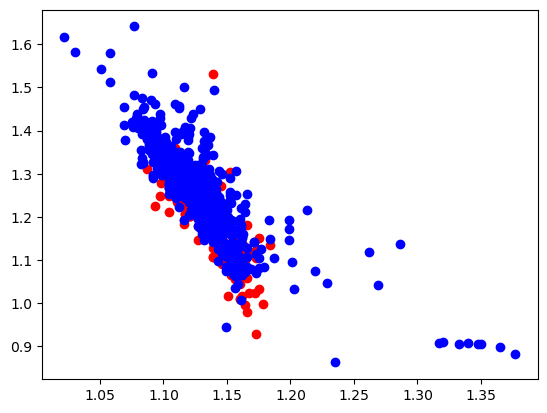

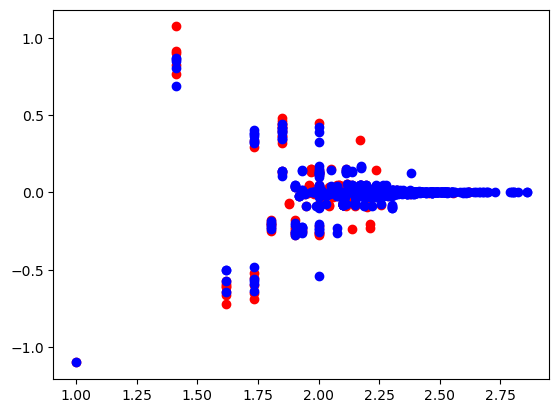

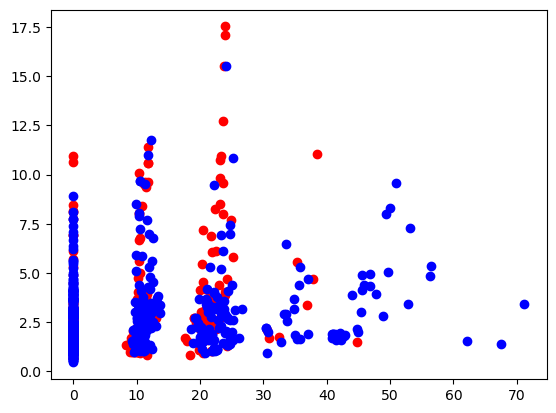

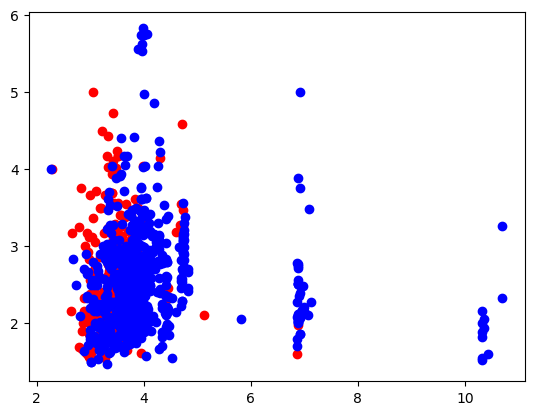

In [129]:
## Représentation des individus en composantes originelles
for var in range(0, len(keysquant)-1, 2):
    
    v1 = data[keysquant[var]]
    v2 = data[keysquant[var+1]]
    
    plt.figure()
    for i in range(1, len(v1)+1):
        color = "red" if data['Y'][i] else "blue"
        plt.plot(v1[i], v2[i], "o",color=color)
    plt.show()

In [ ]:
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, ozone[["MOCAGE","TEMPE","VentMOD",
                                           "VentANG","SRMH2O","LNO2","LNO"]].columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

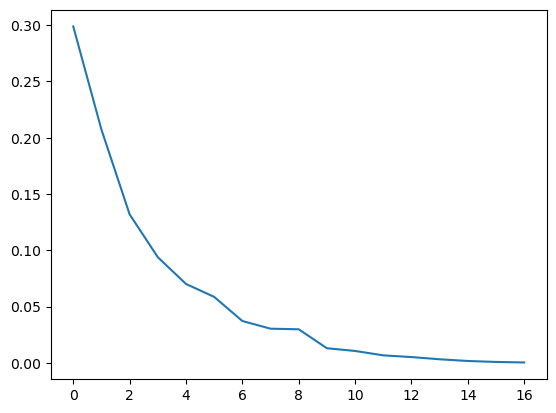

In [131]:
X = scale(data[keysquant])
pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()

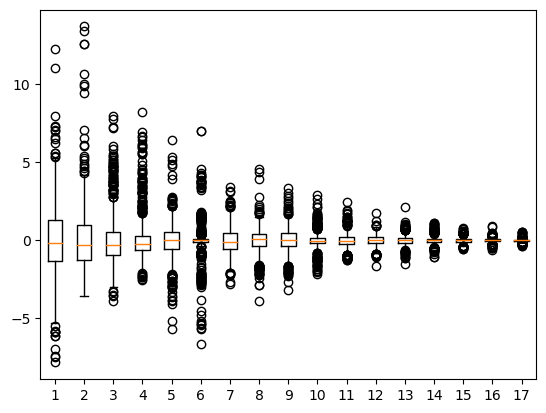

In [132]:
#boxplot des ACP
plt.boxplot(C[:,0:20])
plt.show()

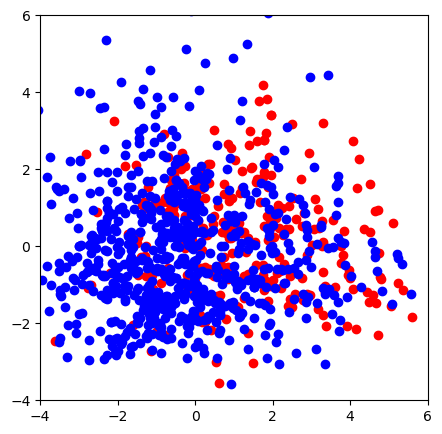

In [134]:
## Représentation des individus en ACP
plt.figure(figsize=(5,5))
for i, j, nom in zip(C[:,0], C[:,1], data['Y']):
    color = "red" if nom  else "blue"
    plt.plot(i, j, "o",color=color)
plt.axis((-4,6,-4,6))  
plt.show()

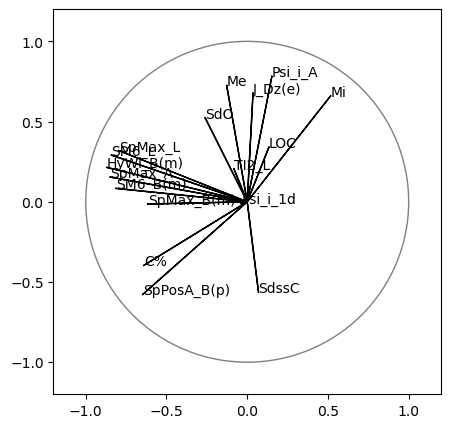

In [135]:
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data[keysquant].columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

In [136]:
from sklearn.cluster  import  KMeans
from  sklearn.metrics  import confusion_matrix
clust=KMeans(n_clusters=4)
clust.fit(X)
classe=clust.labels_
print(classe)

[1 1 1 ... 2 0 3]


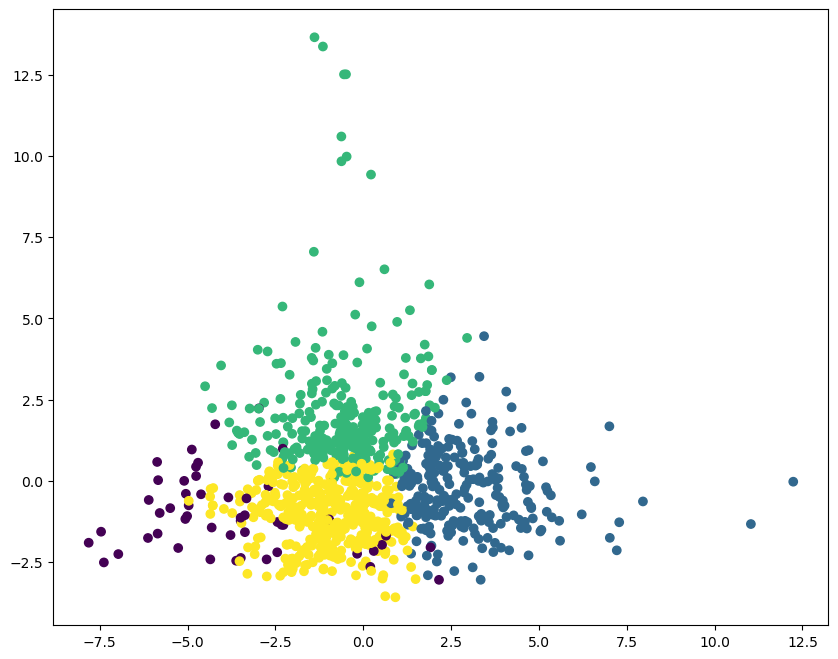

In [137]:
## Repésentation des individus dans les coordonnées de l'acp.
plt.figure(figsize=(10,8))
plt.scatter(C[:,0], C[:,1], c=classe) 
plt.show()

In [146]:
# variable à expliquer binaire
Yb=data["Y"].map(lambda x: int(x))

In [147]:
# Variables explicatives
dataDum=pd.get_dummies(data[keysqual])
print(dataDum)
#del ozoneDum["JOUR_0"]
dfC=pd.concat([dataDum,data[keysquant]],axis=1)
dfC.head()

      F03[C-O]  B01[C-Br]  B03[C-Cl]
1            0          0          0
2            1          0          0
3            0          0          0
4            0          0          0
5            2          0          0
...        ...        ...        ...
1051         2          0          0
1052        21          0          0
1053         9          0          0
1054         0          0          1
1055         0          0          1

[1055 rows x 3 columns]


,F03[C-O],B01[C-Br],B03[C-Cl],SpMax_L,J_Dz(e),C%,SdssC,HyWi_B(m),LOC,SM6_L,Me,Mi,SpPosA_B(p),SpMax_A,Psi_i_1d,SdO,TI2_L,SpMax_B(m),Psi_i_A,SM6_B(m)
1,0,0,0,3.919,2.6909,31.4,0.000,3.106,2.550,9.002,0.960,1.142,1.201,1.932,0.011,0.000,4.489,2.949,1.591,7.253
2,1,0,0,4.170,2.1144,30.8,0.000,2.461,1.393,8.723,0.989,1.144,1.104,2.214,-0.204,0.000,1.542,3.315,1.967,7.257
3,0,0,0,3.932,3.2512,26.7,0.000,3.279,2.585,9.110,1.009,1.152,1.092,1.942,-0.008,0.000,4.891,3.076,2.417,7.601
4,0,0,0,3.000,2.7098,20.0,0.000,2.100,0.918,6.594,1.108,1.167,1.024,1.414,1.073,8.361,1.333,3.046,5.000,6.690
5,2,0,0,4.236,3.3944,29.4,-0.271,3.449,2.753,9.528,1.004,1.147,1.137,1.985,-0.002,10.348,5.588,3.351,2.405,8.003


In [149]:
#Séparation entre trainet test
from sklearn.model_selection import train_test_split  
X_train,X_test,Yb_train,Yb_test=train_test_split(dfC,Yb,test_size=200,random_state=11)

In [150]:
from sklearn import linear_model
regLasso = linear_model.Lasso()
regLasso.fit(Xr_train,Yr_train)
prev=regLasso.predict(Xr_test)
print("MSE=",mean_squared_error(Yr_test,prev))

NameError: name 'Xr_train' is not defined